In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Učitavanje Iris dataseta
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Osnovne informacije o Iris datasetu
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Osnovne statističke karakteristike dataseta
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


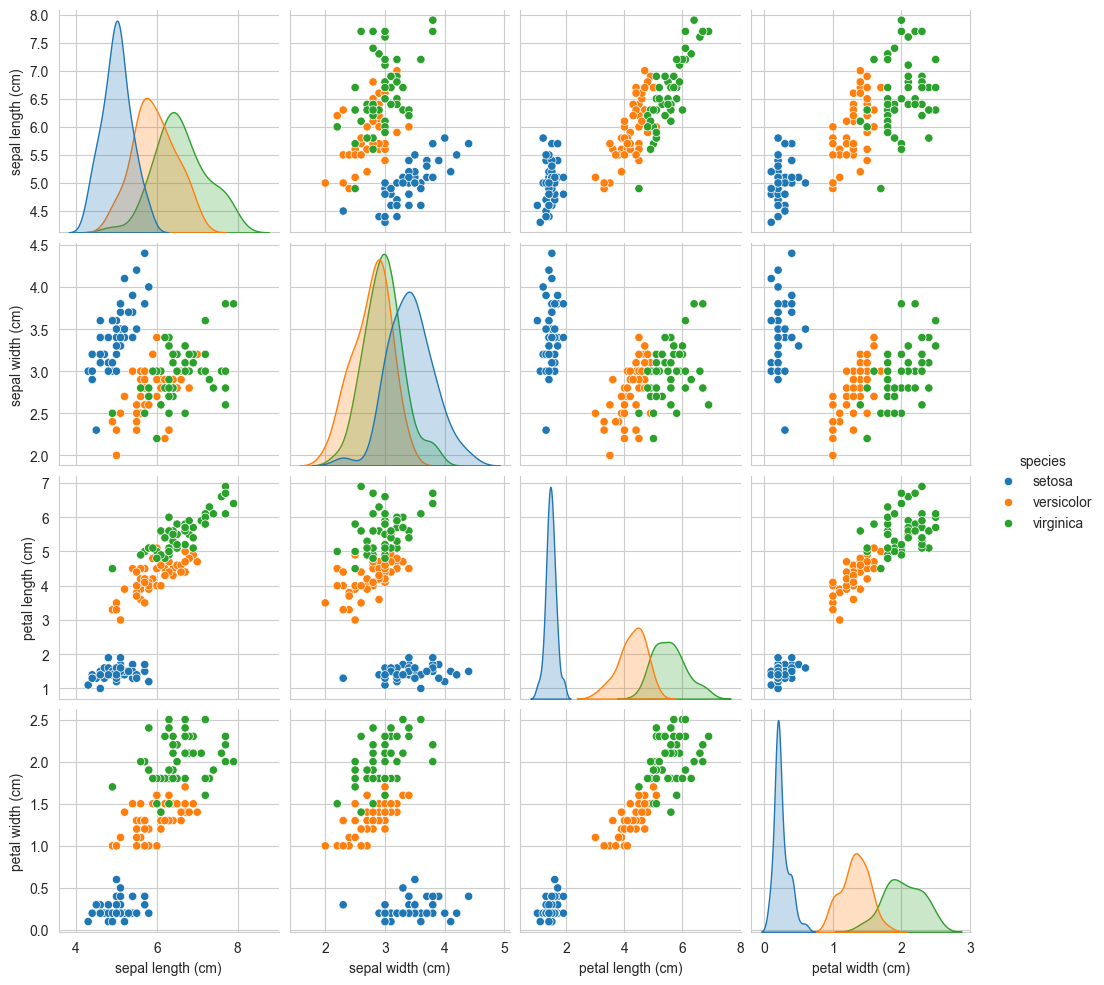

In [ ]:
# Pairplot for visual EDA
sns.pairplot(iris_df, hue='species')
plt.show()

In [ ]:

# Razdvajanje podataka na trening i test podatke
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Skaliranje karakteristika
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train a linear SVM classifier
svm_model = svm.SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy


0.9666666666666667

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



- Klasa 0: Iris Setosa
- Klasa 1: Iris Versicolor
- Klasa 2: Iris Virginica

Preciznost za svaku klasu pokazuje koliko je model precizno klasificirao svaku vrstu Irisa. Ako je preciznost 1.00 za Iris Setosa, to znači da je model tačno identificirao sve instance Iris Setosa bez greške.

Odziv za svaku klasu ukazuje koliko je dobro model identificirao sve stvarne instance te vrste. Na primjer, odziv 0.89 za Iris Versicolor znači da je model pronašao 89% stvarnih Iris Versicolor cvjetova u datasetu.

F1-Score daje ukupnu ocjenu koja kombinira preciznost i odziv, dajući jasnu sliku balansa između ove dvije metrike za svaku vrstu Irisa.


Podrška ukazuje na broj instanci svake vrste cvijeta u datasetu koji je korišten za evaluaciju modela.

Radial Basic Function

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Radial Basic Function SVM classifier
svm_model_rbf = svm.SVC(kernel='rbf')
svm_model_rbf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model_rbf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

1.0

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

